In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
import warnings
warnings.filterwarnings('ignore')

# Generate sample dataset (replace with your actual dataset)
X, y_true = make_blobs(n_samples=500, n_features=2, centers=4, 
                       cluster_std=0.8, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Visualization helper function
def plot_clusters(X, labels, title, centers=None):
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', 
                         alpha=0.6, edgecolors='k')
    if centers is not None:
        plt.scatter(centers[:, 0], centers[:, 1], c='red', 
                   marker='X', s=200, edgecolors='black', label='Centers')
        plt.legend()
    plt.colorbar(scatter)
    plt.title(title)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.tight_layout()
    plt.show()

# Evaluation metrics function
def evaluate_clustering(X, labels, algorithm_name, params_str):
    silhouette = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    calinski_harabasz = calinski_harabasz_score(X, labels)
    
    print(f"\n{algorithm_name} - {params_str}")
    print(f"Silhouette Score: {silhouette:.4f} (higher is better, range: -1 to 1)")
    print(f"Davies-Bouldin Index: {davies_bouldin:.4f} (lower is better)")
    print(f"Calinski-Harabasz Index: {calinski_harabasz:.4f} (higher is better)")
    
    return silhouette, davies_bouldin, calinski_harabasz


--- Varying Number of Clusters ---

K-Means - n_clusters=2
Silhouette Score: 0.4876 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 1.0926 (lower is better)
Calinski-Harabasz Index: 404.4649 (higher is better)

K-Means - n_clusters=3
Silhouette Score: 0.7667 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.3452 (lower is better)
Calinski-Harabasz Index: 2041.2408 (higher is better)


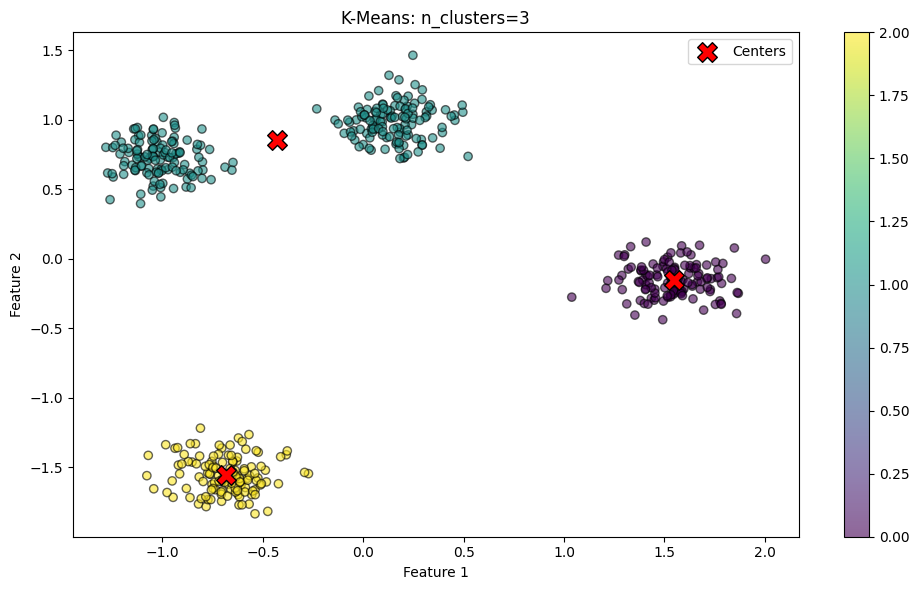


K-Means - n_clusters=4
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)


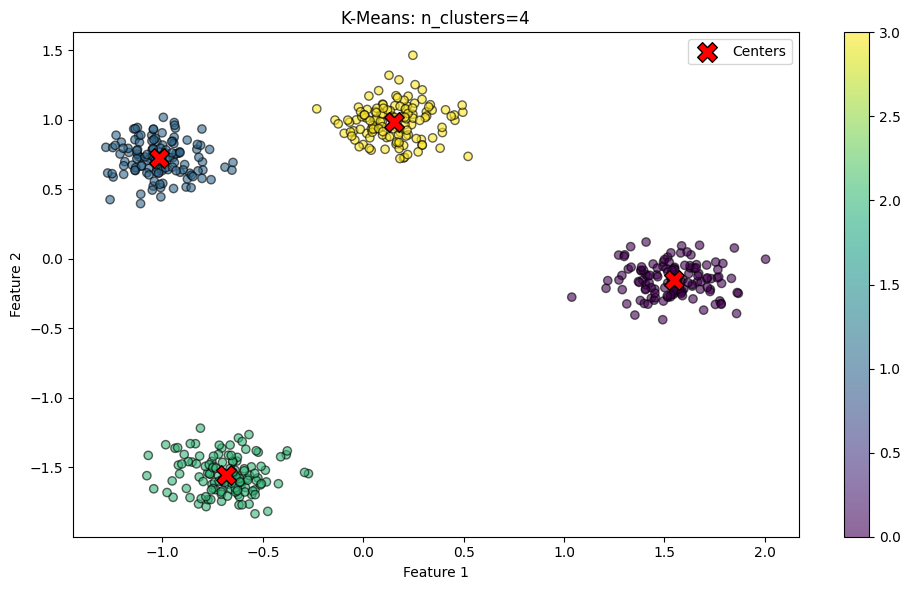


K-Means - n_clusters=5
Silhouette Score: 0.7202 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.5773 (lower is better)
Calinski-Harabasz Index: 7166.9723 (higher is better)

K-Means - n_clusters=6
Silhouette Score: 0.5932 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.7979 (lower is better)
Calinski-Harabasz Index: 6524.4931 (higher is better)

--- Varying Initialization Method ---

K-Means - init=k-means++
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)


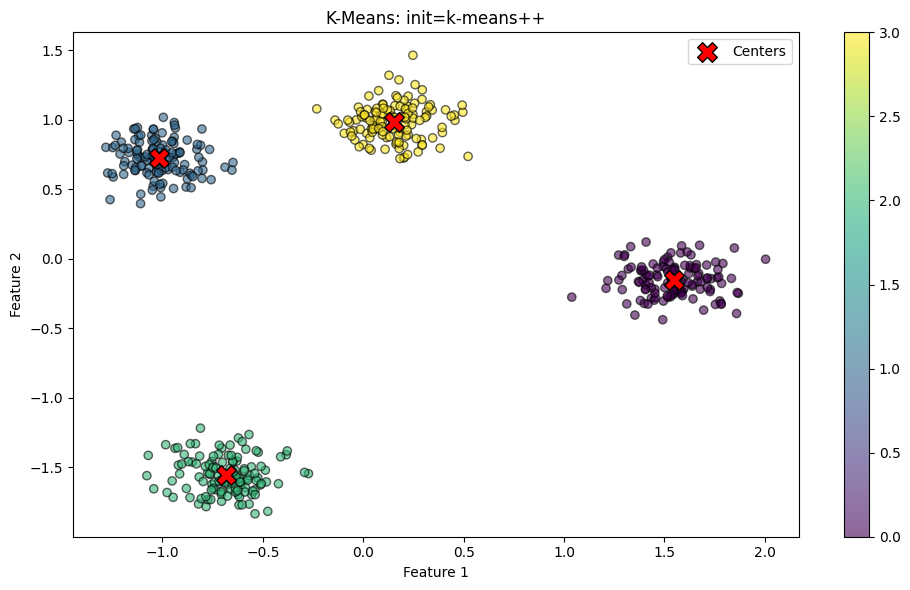


K-Means - init=random
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)


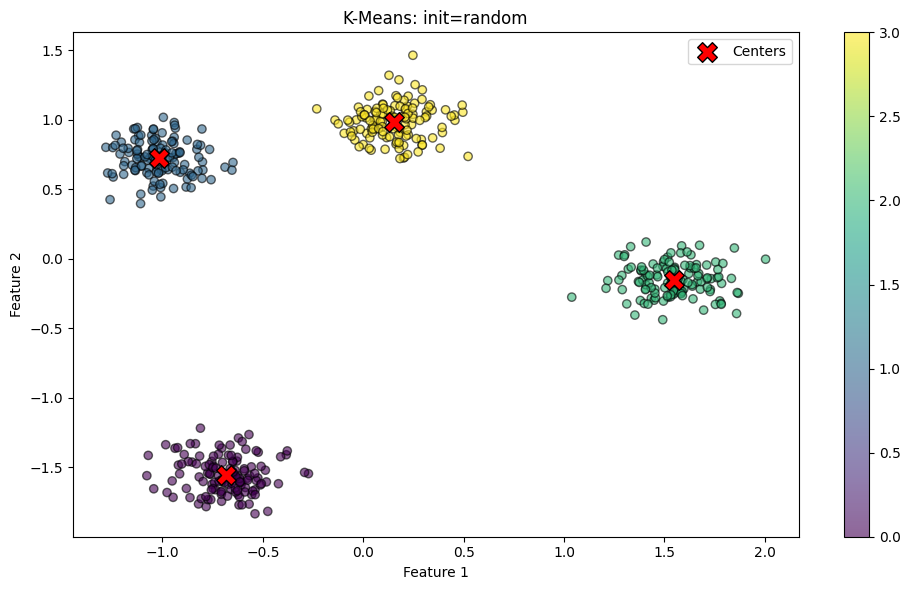


--- Varying Number of Initializations ---

K-Means - n_init=1
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)

K-Means - n_init=5
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)

K-Means - n_init=10
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)

K-Means - n_init=20
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)

--- Varying Maximum Iterations ---

K-Means - max_iter=50
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)

K-Means - 

In [2]:
# K-Means Clustering Analysis
kmeans_results = []

# Parameter 1: Number of clusters (n_clusters)
print("\n--- Varying Number of Clusters ---")
for n_clusters in [2, 3, 4, 5, 6]:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    metrics = evaluate_clustering(X_scaled, labels, "K-Means", 
                                  f"n_clusters={n_clusters}")
    kmeans_results.append(['n_clusters', n_clusters, *metrics])
    
    if n_clusters in [3, 4]:  # Visualize selected configurations
        plot_clusters(X_scaled, labels, 
                     f"K-Means: n_clusters={n_clusters}",
                     kmeans.cluster_centers_)

# Parameter 2: Initialization method (init)
print("\n--- Varying Initialization Method ---")
for init_method in ['k-means++', 'random']:
    kmeans = KMeans(n_clusters=4, init=init_method, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    metrics = evaluate_clustering(X_scaled, labels, "K-Means", 
                                  f"init={init_method}")
    kmeans_results.append(['init', init_method, *metrics])
    plot_clusters(X_scaled, labels, 
                 f"K-Means: init={init_method}",
                 kmeans.cluster_centers_)

# Parameter 3: Number of runs (n_init)
print("\n--- Varying Number of Initializations ---")
for n_init in [1, 5, 10, 20]:
    kmeans = KMeans(n_clusters=4, n_init=n_init, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    metrics = evaluate_clustering(X_scaled, labels, "K-Means", 
                                  f"n_init={n_init}")
    kmeans_results.append(['n_init', n_init, *metrics])

# Parameter 4: Maximum iterations (max_iter)
print("\n--- Varying Maximum Iterations ---")
for max_iter in [50, 100, 300, 500]:
    kmeans = KMeans(n_clusters=4, max_iter=max_iter, random_state=42)
    labels = kmeans.fit_predict(X_scaled)
    metrics = evaluate_clustering(X_scaled, labels, "K-Means", 
                                  f"max_iter={max_iter}")
    kmeans_results.append(['max_iter', max_iter, *metrics])

# K-Means Results Summary
kmeans_df = pd.DataFrame(kmeans_results, 
                         columns=['Parameter', 'Value', 'Silhouette', 
                                 'Davies-Bouldin', 'Calinski-Harabasz'])
print("\n" + "="*80)
print("K-MEANS RESULTS SUMMARY")
print("="*80)
print(kmeans_df)


--- Varying Number of Clusters ---

K-Medoids - n_clusters=2
Silhouette Score: 0.4996 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.6684 (lower is better)
Calinski-Harabasz Index: 334.9294 (higher is better)

K-Medoids - n_clusters=3
Silhouette Score: 0.7667 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.3452 (lower is better)
Calinski-Harabasz Index: 2041.2408 (higher is better)


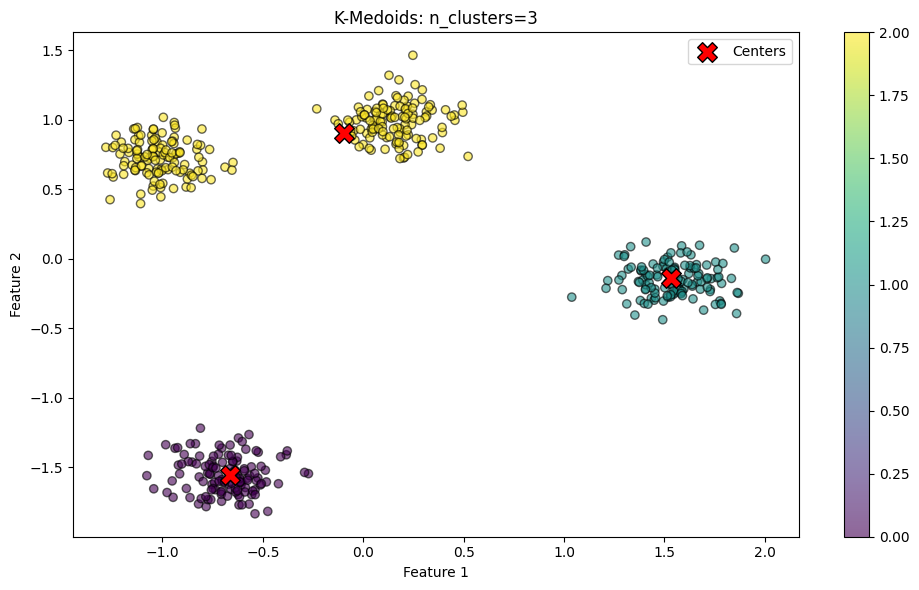


K-Medoids - n_clusters=4
Silhouette Score: 0.6277 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.7306 (lower is better)
Calinski-Harabasz Index: 1383.6072 (higher is better)


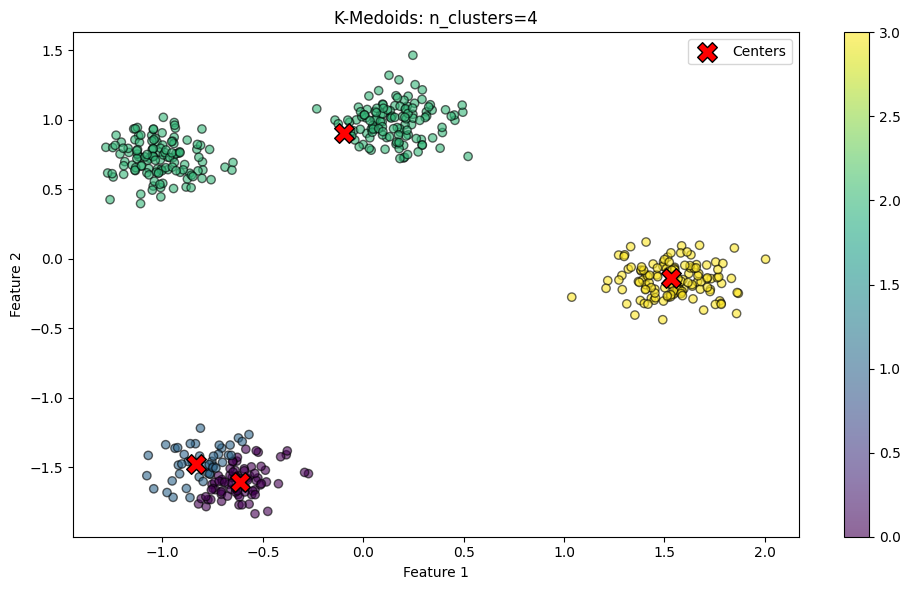


K-Medoids - n_clusters=5
Silhouette Score: 0.7063 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.5927 (lower is better)
Calinski-Harabasz Index: 7212.5472 (higher is better)

K-Medoids - n_clusters=6
Silhouette Score: 0.5814 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.8311 (lower is better)
Calinski-Harabasz Index: 6392.4746 (higher is better)

--- Varying Distance Metric ---

K-Medoids - metric=euclidean
Silhouette Score: 0.6277 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.7306 (lower is better)
Calinski-Harabasz Index: 1383.6072 (higher is better)


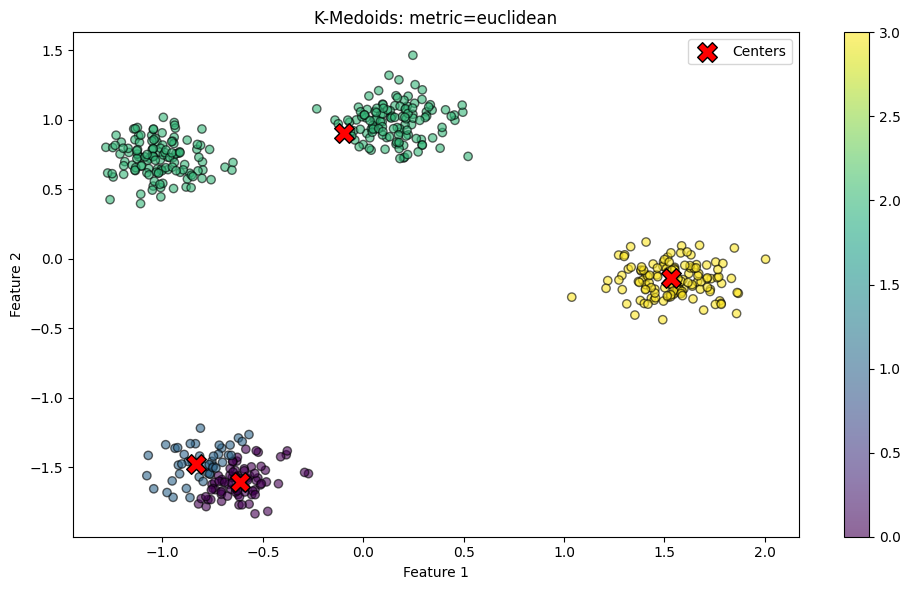


K-Medoids - metric=manhattan
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)


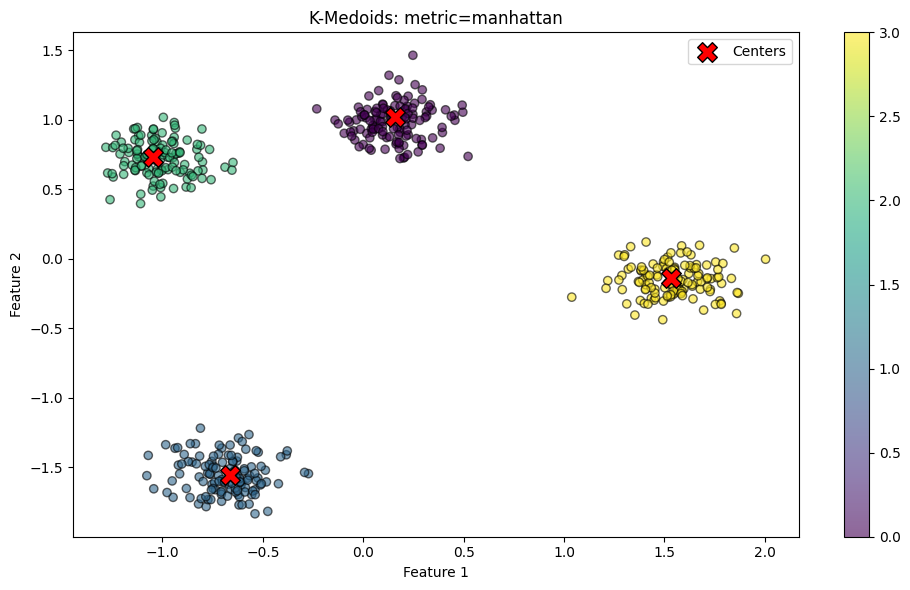


K-Medoids - metric=cosine
Silhouette Score: 0.3761 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.9232 (lower is better)
Calinski-Harabasz Index: 299.4473 (higher is better)


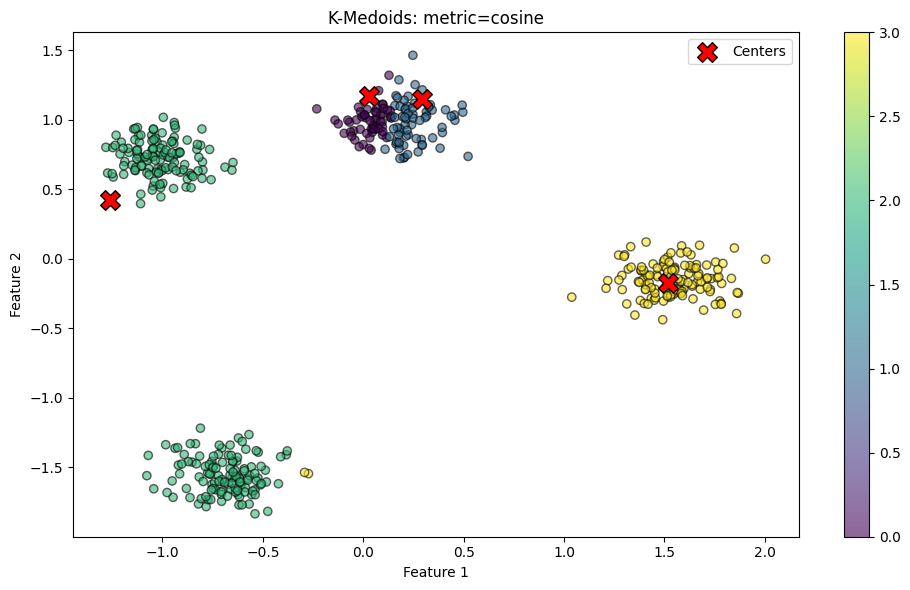


--- Varying Initialization Method ---

K-Medoids - init=k-medoids++
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)

K-Medoids - init=random
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)

K-Medoids - init=heuristic
Silhouette Score: 0.6277 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.7306 (lower is better)
Calinski-Harabasz Index: 1383.6072 (higher is better)

--- Varying Maximum Iterations ---

K-Medoids - max_iter=50
Silhouette Score: 0.6277 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.7306 (lower is better)
Calinski-Harabasz Index: 1383.6072 (higher is better)

K-Medoids - max_iter=100
Silhouette Score: 0.6277 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.7306 (lower is better)
Calinski-Harabasz Index: 1383.6072 (high

In [3]:
kmedoids_results = []

# Parameter 1: Number of clusters (n_clusters)
print("\n--- Varying Number of Clusters ---")
for n_clusters in [2, 3, 4, 5, 6]:
    kmedoids = KMedoids(n_clusters=n_clusters, random_state=42)
    labels = kmedoids.fit_predict(X_scaled)
    metrics = evaluate_clustering(X_scaled, labels, "K-Medoids", 
                                  f"n_clusters={n_clusters}")
    kmedoids_results.append(['n_clusters', n_clusters, *metrics])
    
    if n_clusters in [3, 4]:
        plot_clusters(X_scaled, labels, 
                     f"K-Medoids: n_clusters={n_clusters}",
                     kmedoids.cluster_centers_)

# Parameter 2: Distance metric
print("\n--- Varying Distance Metric ---")
for metric in ['euclidean', 'manhattan', 'cosine']:
    kmedoids = KMedoids(n_clusters=4, metric=metric, random_state=42)
    labels = kmedoids.fit_predict(X_scaled)
    metrics = evaluate_clustering(X_scaled, labels, "K-Medoids", 
                                  f"metric={metric}")
    kmedoids_results.append(['metric', metric, *metrics])
    plot_clusters(X_scaled, labels, 
                 f"K-Medoids: metric={metric}",
                 kmedoids.cluster_centers_)

# Parameter 3: Initialization method
print("\n--- Varying Initialization Method ---")
for init_method in ['k-medoids++', 'random', 'heuristic']:
    kmedoids = KMedoids(n_clusters=4, init=init_method, random_state=42)
    labels = kmedoids.fit_predict(X_scaled)
    metrics = evaluate_clustering(X_scaled, labels, "K-Medoids", 
                                  f"init={init_method}")
    kmedoids_results.append(['init', init_method, *metrics])

# Parameter 4: Maximum iterations
print("\n--- Varying Maximum Iterations ---")
for max_iter in [50, 100, 300, 500]:
    kmedoids = KMedoids(n_clusters=4, max_iter=max_iter, random_state=42)
    labels = kmedoids.fit_predict(X_scaled)
    metrics = evaluate_clustering(X_scaled, labels, "K-Medoids", 
                                  f"max_iter={max_iter}")
    kmedoids_results.append(['max_iter', max_iter, *metrics])

# K-Medoids Results Summary
kmedoids_df = pd.DataFrame(kmedoids_results, 
                           columns=['Parameter', 'Value', 'Silhouette', 
                                   'Davies-Bouldin', 'Calinski-Harabasz'])
print("\n" + "="*80)
print("K-MEDOIDS RESULTS SUMMARY")
print("="*80)
print(kmedoids_df)


--- Varying Linkage Methods ---

Hierarchical - linkage=ward
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)


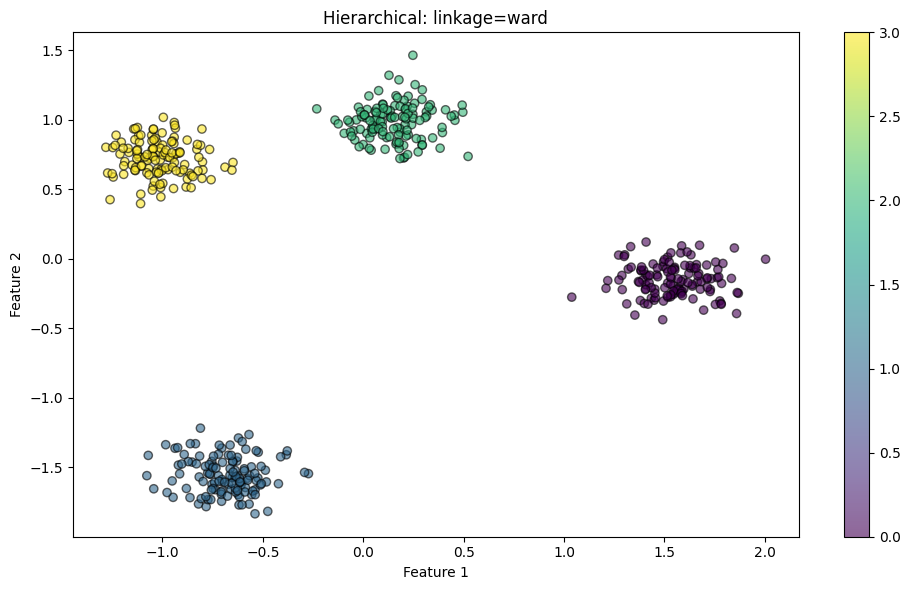


Hierarchical - linkage=complete
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)


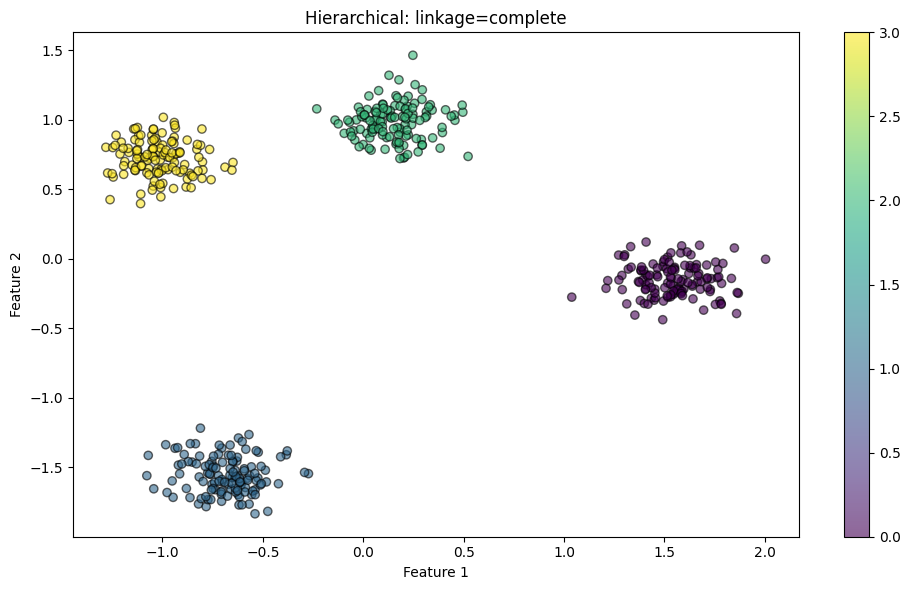


Hierarchical - linkage=average
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)


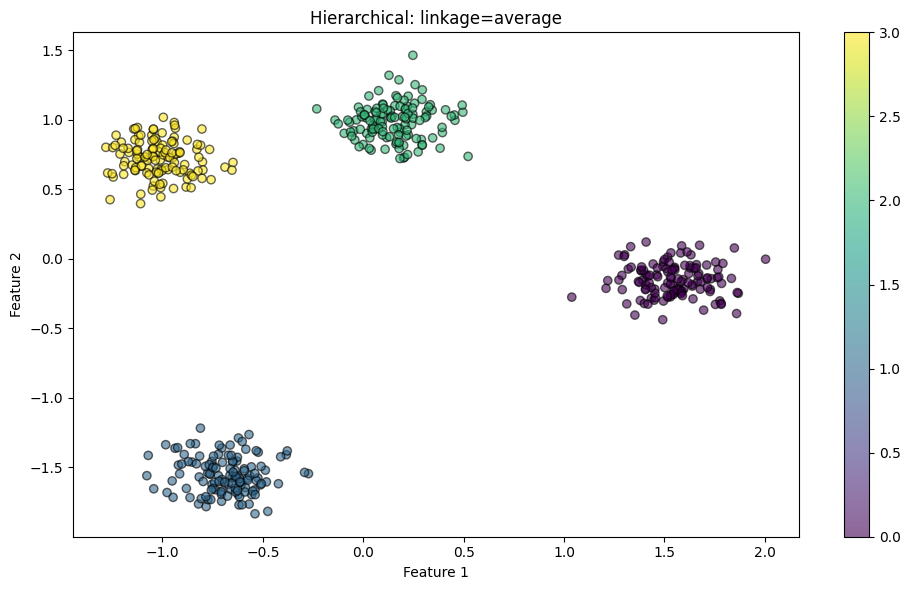


Hierarchical - linkage=single
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)


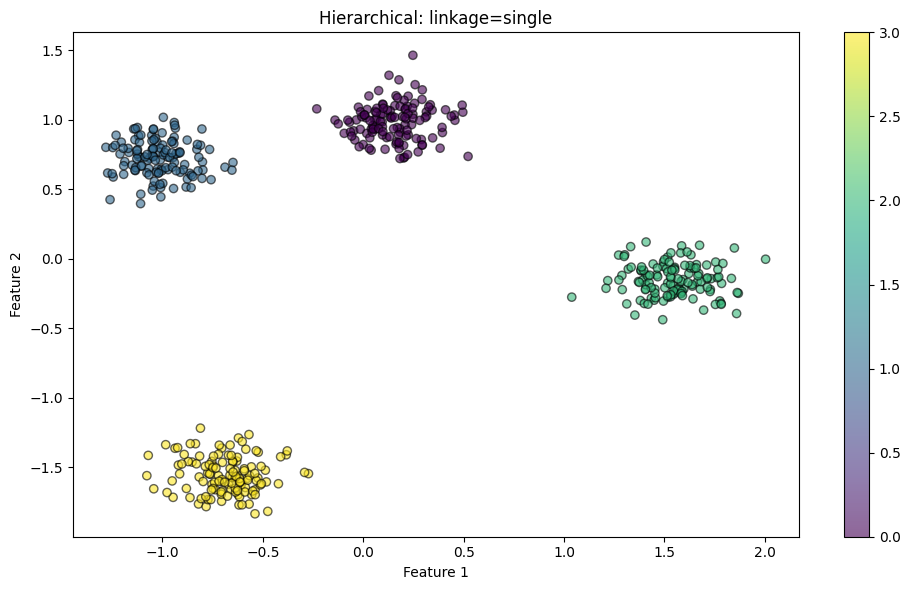


--- Varying Distance Metrics (with 'complete' linkage) ---

Hierarchical - metric=euclidean
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)

Hierarchical - metric=manhattan
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)

Hierarchical - metric=cosine
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)

HIERARCHICAL CLUSTERING RESULTS SUMMARY
  Parameter      Value  Silhouette  Davies-Bouldin  Calinski-Harabasz
0   linkage       ward    0.839294        0.224655        8696.812821
1   linkage   complete    0.839294        0.224655        8696.812821
2   linkage    average    0.839294        0.224655        8696.812821
3   linkage     single    0.839294      

In [4]:
hierarchical_results = []

# Test all linkage methods
linkage_methods = ['ward', 'complete', 'average', 'single']

print("\n--- Varying Linkage Methods ---")
for linkage_method in linkage_methods:
    # For ward, we must use euclidean distance
    if linkage_method == 'ward':
        hierarchical = AgglomerativeClustering(n_clusters=4, 
                                              linkage=linkage_method)
    else:
        hierarchical = AgglomerativeClustering(n_clusters=4, 
                                              linkage=linkage_method,
                                              metric='euclidean')
    
    labels = hierarchical.fit_predict(X_scaled)
    metrics = evaluate_clustering(X_scaled, labels, "Hierarchical", 
                                  f"linkage={linkage_method}")
    hierarchical_results.append(['linkage', linkage_method, *metrics])
    plot_clusters(X_scaled, labels, 
                 f"Hierarchical: linkage={linkage_method}")

# Test different distance metrics (for non-ward linkages)
print("\n--- Varying Distance Metrics (with 'complete' linkage) ---")
for metric in ['euclidean', 'manhattan', 'cosine']:
    hierarchical = AgglomerativeClustering(n_clusters=4, 
                                          linkage='complete',
                                          metric=metric)
    labels = hierarchical.fit_predict(X_scaled)
    metrics = evaluate_clustering(X_scaled, labels, "Hierarchical", 
                                  f"metric={metric}")
    hierarchical_results.append(['metric', metric, *metrics])

# Hierarchical Results Summary
hierarchical_df = pd.DataFrame(hierarchical_results, 
                              columns=['Parameter', 'Value', 'Silhouette', 
                                      'Davies-Bouldin', 'Calinski-Harabasz'])
print("\n" + "="*80)
print("HIERARCHICAL CLUSTERING RESULTS SUMMARY")
print("="*80)
print(hierarchical_df)

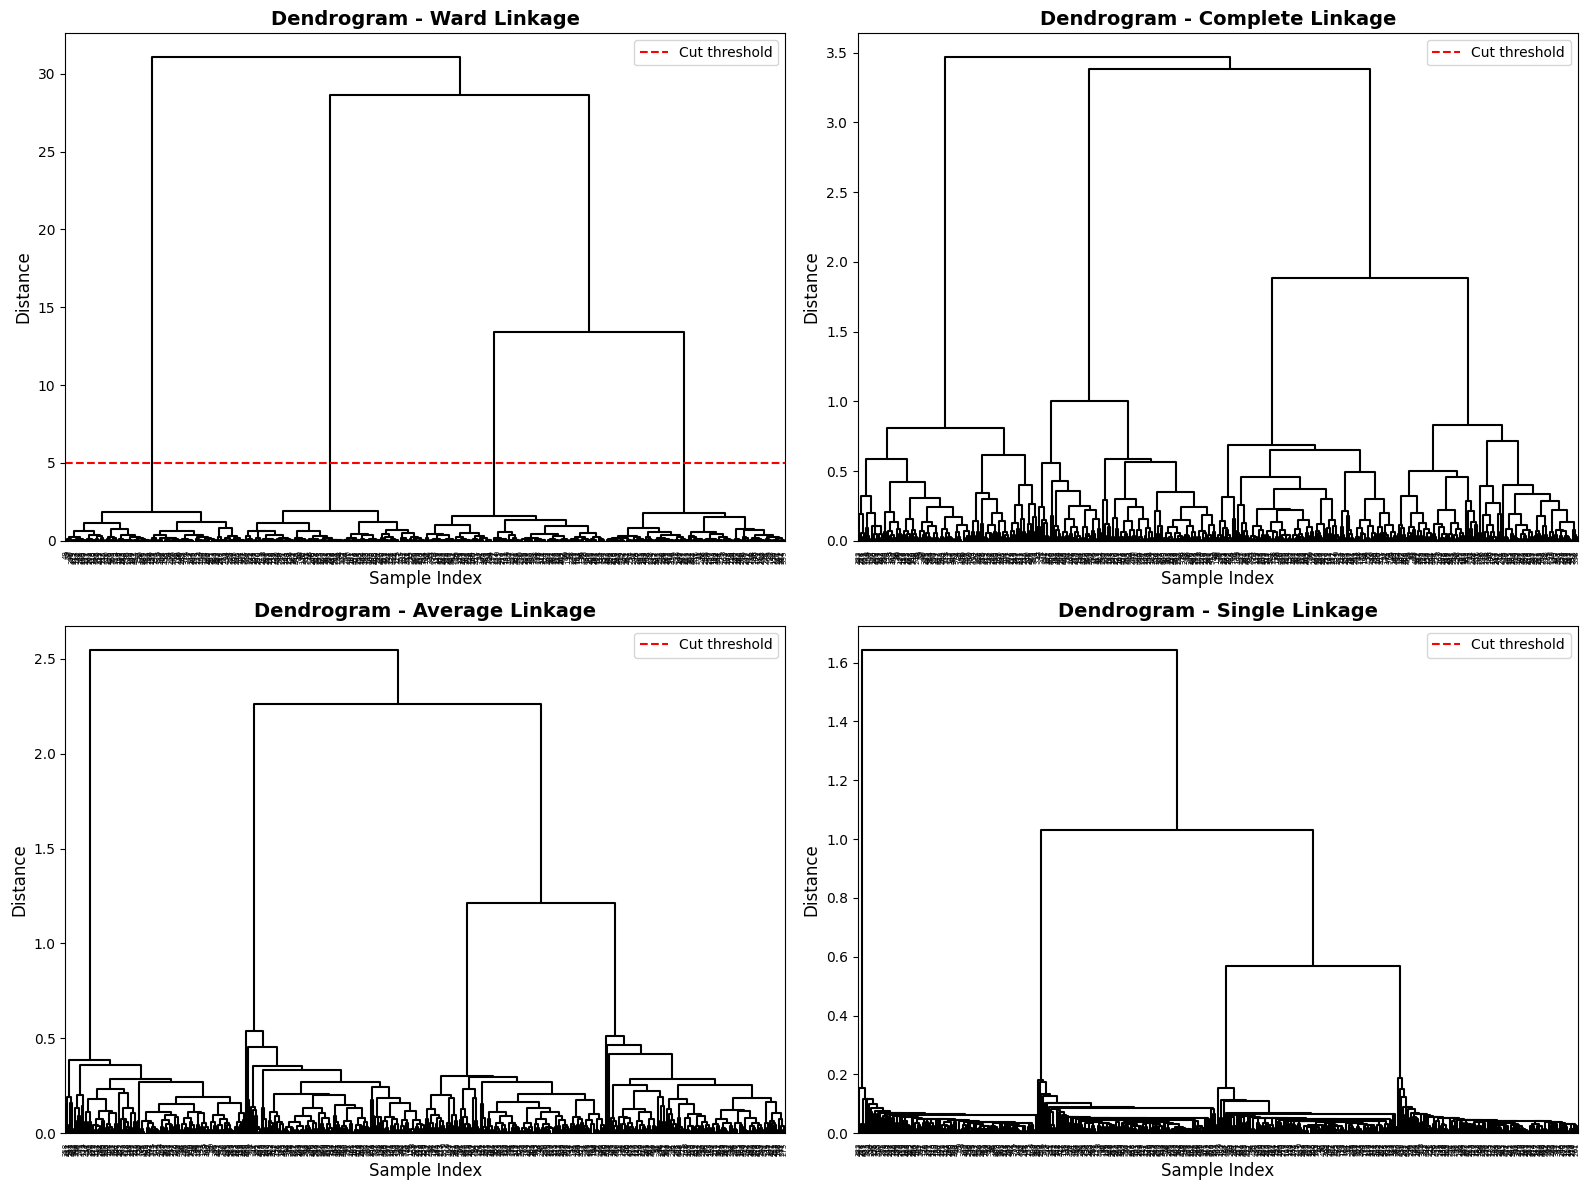

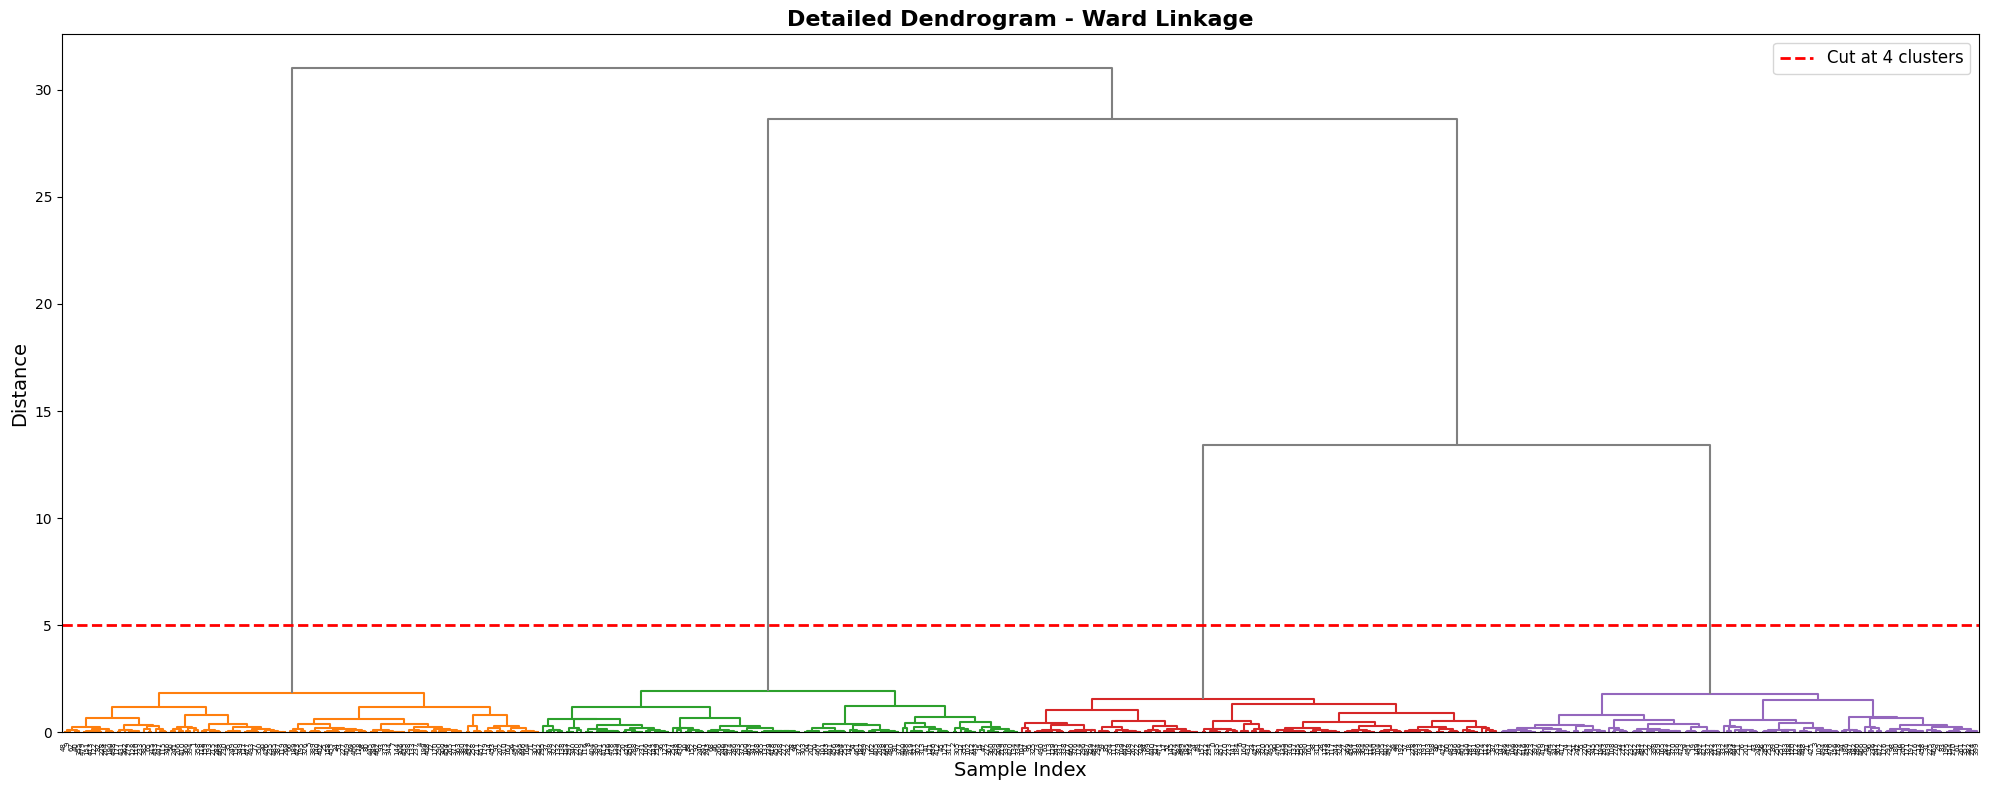

In [5]:
# Create dendrograms for all linkage methods
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for idx, linkage_method in enumerate(linkage_methods):
    Z = linkage(X_scaled, method=linkage_method)
    
    ax = axes[idx]
    dendrogram(Z, ax=ax, color_threshold=0, above_threshold_color='black')
    ax.set_title(f'Dendrogram - {linkage_method.capitalize()} Linkage', 
                fontsize=14, fontweight='bold')
    ax.set_xlabel('Sample Index', fontsize=12)
    ax.set_ylabel('Distance', fontsize=12)
    ax.axhline(y=5, color='r', linestyle='--', label='Cut threshold')
    ax.legend()

plt.tight_layout()
plt.show()

# Create a larger dendrogram for detailed analysis
plt.figure(figsize=(20, 8))
Z = linkage(X_scaled, method='ward')
dendrogram(Z, color_threshold=5, above_threshold_color='gray',
          labels=range(len(X_scaled)))
plt.title('Detailed Dendrogram - Ward Linkage', fontsize=16, fontweight='bold')
plt.xlabel('Sample Index', fontsize=14)
plt.ylabel('Distance', fontsize=14)
plt.axhline(y=5, color='r', linestyle='--', linewidth=2, label='Cut at 4 clusters')
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

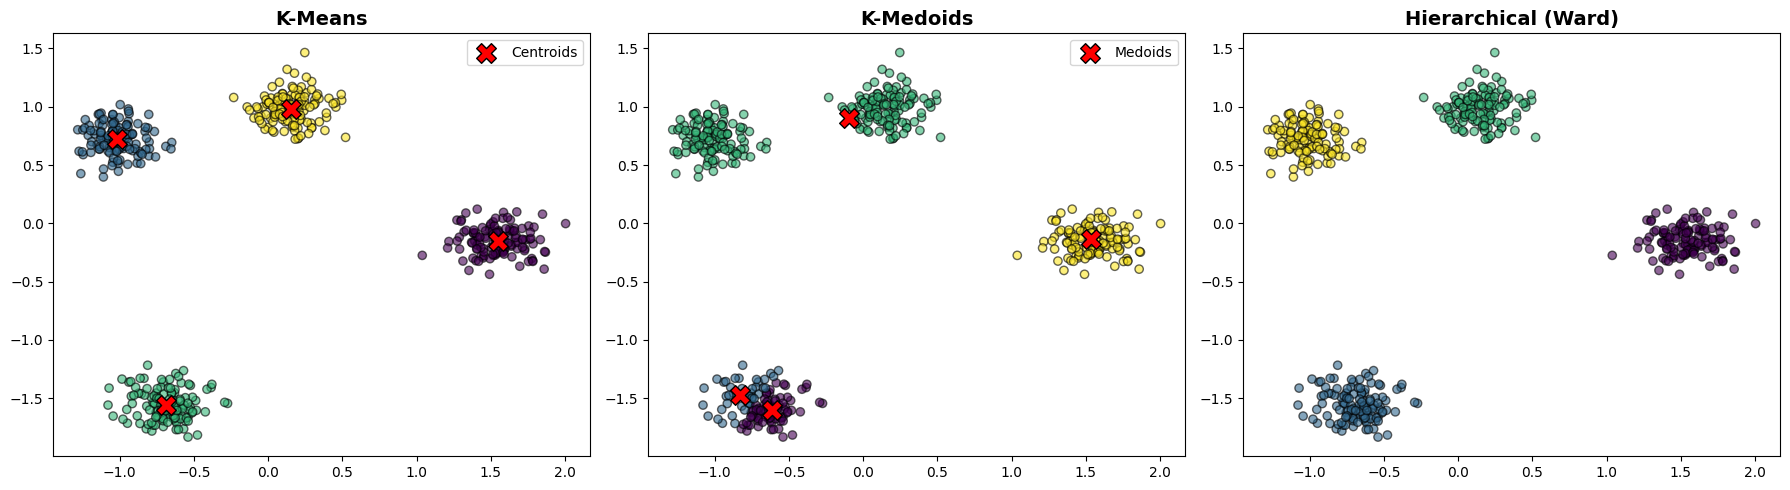


Final Metrics Comparison:

K-Means - Best Config
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)

K-Medoids - Best Config
Silhouette Score: 0.6277 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.7306 (lower is better)
Calinski-Harabasz Index: 1383.6072 (higher is better)

Hierarchical - Best Config
Silhouette Score: 0.8393 (higher is better, range: -1 to 1)
Davies-Bouldin Index: 0.2247 (lower is better)
Calinski-Harabasz Index: 8696.8128 (higher is better)


(0.839294045514126, 0.2246551397498335, 8696.812821178548)

In [6]:
best_kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=42)
best_kmedoids = KMedoids(n_clusters=4, metric='euclidean', random_state=42)
best_hierarchical = AgglomerativeClustering(n_clusters=4, linkage='ward')

kmeans_labels = best_kmeans.fit_predict(X_scaled)
kmedoids_labels = best_kmedoids.fit_predict(X_scaled)
hierarchical_labels = best_hierarchical.fit_predict(X_scaled)

# Comparative visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, 
               cmap='viridis', alpha=0.6, edgecolors='k')
axes[0].scatter(best_kmeans.cluster_centers_[:, 0], 
               best_kmeans.cluster_centers_[:, 1],
               c='red', marker='X', s=200, edgecolors='black', label='Centroids')
axes[0].set_title('K-Means', fontsize=14, fontweight='bold')
axes[0].legend()

axes[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmedoids_labels, 
               cmap='viridis', alpha=0.6, edgecolors='k')
axes[1].scatter(best_kmedoids.cluster_centers_[:, 0], 
               best_kmedoids.cluster_centers_[:, 1],
               c='red', marker='X', s=200, edgecolors='black', label='Medoids')
axes[1].set_title('K-Medoids', fontsize=14, fontweight='bold')
axes[1].legend()

axes[2].scatter(X_scaled[:, 0], X_scaled[:, 1], c=hierarchical_labels, 
               cmap='viridis', alpha=0.6, edgecolors='k')
axes[2].set_title('Hierarchical (Ward)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Final comparison metrics
print("\nFinal Metrics Comparison:")
evaluate_clustering(X_scaled, kmeans_labels, "K-Means", "Best Config")
evaluate_clustering(X_scaled, kmedoids_labels, "K-Medoids", "Best Config")
evaluate_clustering(X_scaled, hierarchical_labels, "Hierarchical", "Best Config")